In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Data Cleaning

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48901,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39
48902,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314
48903,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333
48904,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,31-10-2018,0.22,1,0


In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [5]:
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3439,2062630,Large 1 bedroom apartment (shared),6313448,Lexy,Bronx,Bronxdale,40.85667,-73.86543,Entire home/apt,80,1,1,19-08-2014,0.02,1,0
32056,25031387,2 Bedroom 1 Bath by NYC Train and Major Highways,72517332,Monique & Bianca,Bronx,Kingsbridge,40.88485,-73.89756,Entire home/apt,399,2,25,09-06-2019,1.79,1,356
28546,22120954,Newly Renovated 2 Bedroom Apt Sleeps 6,26800283,Marko,Manhattan,Upper East Side,40.77267,-73.94735,Entire home/apt,400,2,1,10-07-2018,0.08,1,0
36941,29365401,4min subway. Prime locations. single sofa bed...,196058543,美德,Queens,Forest Hills,40.72192,-73.83931,Shared room,40,2,20,29-05-2019,2.40,5,230
4666,3271893,Park Slope Town House,327673,Stefano,Brooklyn,Park Slope,40.67592,-73.98107,Entire home/apt,250,3,16,05-07-2019,0.27,2,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48906 entries, 0 to 48905
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48906 non-null  int64  
 1   name                            48890 non-null  object 
 2   host_id                         48906 non-null  int64  
 3   host_name                       48885 non-null  object 
 4   neighbourhood_group             48906 non-null  object 
 5   neighbourhood                   48906 non-null  object 
 6   latitude                        48906 non-null  float64
 7   longitude                       48906 non-null  float64
 8   room_type                       48906 non-null  object 
 9   price                           48906 non-null  int64  
 10  minimum_nights                  48906 non-null  int64  
 11  number_of_reviews               48906 non-null  int64  
 12  last_review                     

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48901     True
48902     True
48903     True
48904     True
48905     True
Length: 48906, dtype: bool

## For checking in our data frame which strategy we can use for filling Null value.

<Axes: xlabel='reviews_per_month', ylabel='Density'>

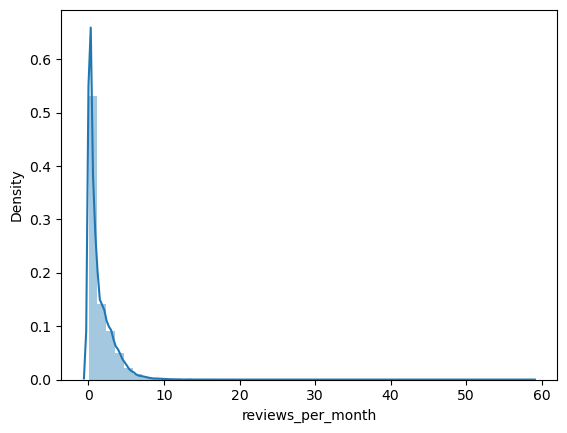

In [9]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.distplot(df['reviews_per_month'])

In [10]:
df.iloc[:,13:14]

,reviews_per_month
0,0.21
1,0.38
2,NaN
3,4.64
4,0.10
...,...
48901,1.50
48902,1.34
48903,0.91
48904,0.22


## Filling Missing value through imputer

In [11]:
impute =  SimpleImputer(strategy = 'median')

In [12]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(),inplace=True)

In [13]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
impute = SimpleImputer(strategy ='most_frequent')

In [96]:
df['last_review'].fillna(df1['last_review'].mode()[0],inplace=True)

KeyError: 'last_review'

In [95]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
df['name'].fillna(df['name'].mode()[0],inplace=True)

In [18]:
df['host_name'].fillna(df['host_name'].mode()[0],inplace=True)

In [19]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [20]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [21]:
impute = SimpleImputer(strategy ='most_frequent')

In [22]:
df['last_review'].fillna(df1['last_review'].mode()[0],inplace=True)

NameError: name 'df1' is not defined

In [23]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [24]:
df.duplicated().sum()

11

In [25]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48895,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
48896,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
48897,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
48898,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
48899,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188
48900,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6
48901,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39
48902,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314
48903,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333
48904,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,31-10-2018,0.22,1,0


In [26]:
df[df.duplicated(keep ="first")]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48895,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
48896,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
48897,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
48898,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
48899,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188
48900,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6
48901,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39
48902,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314
48903,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333
48904,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,31-10-2018,0.22,1,0


In [27]:
df[df.duplicated(keep ="last")]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,31-10-2018,0.22,1,0


In [28]:
df[df.duplicated(keep =False)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,31-10-2018,0.22,1,0


In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().sum()

0

<Axes: ylabel='latitude'>

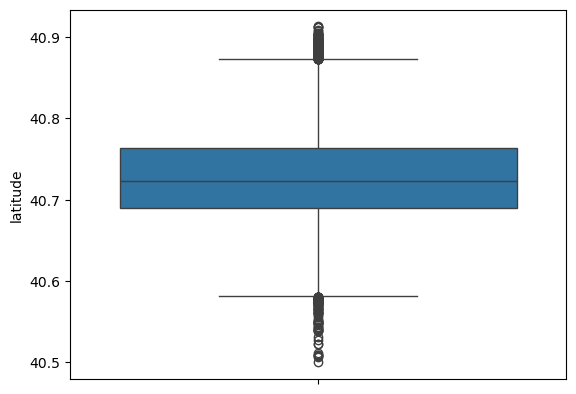

In [31]:
sns.boxplot(df['latitude'])

In [32]:
df1 = pd.read_csv("scholarship.csv")

In [33]:
df1

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [34]:
df1.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [35]:
df.shape

(48895, 16)

# Z score 

<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

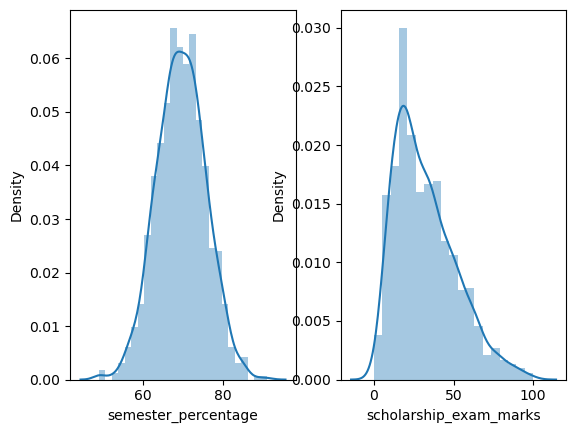

In [36]:
plt.subplot(1,2,1)
sns.distplot(df1["semester_percentage"])
plt.subplot(1,2,2)
sns.distplot(df1["scholarship_exam_marks"])

In [37]:
mean= df1["semester_percentage"].mean()
std= df1["semester_percentage"].std()

In [38]:
print(mean, ",", std)

69.6124 , 6.158978751323897


In [39]:
highest_allowed = mean + 3*std
lowest_allowed = mean - 3*std

print(highest_allowed, ",", lowest_allowed)

88.08933625397168 , 51.13546374602831


In [40]:
df1[(df1["semester_percentage"] < lowest_allowed) | (df1["semester_percentage"] > highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


In [41]:
df2 = df1[(df1["semester_percentage"] > lowest_allowed) & (df1["semester_percentage"] < highest_allowed)]
df2

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


<Axes: ylabel='semester_percentage'>

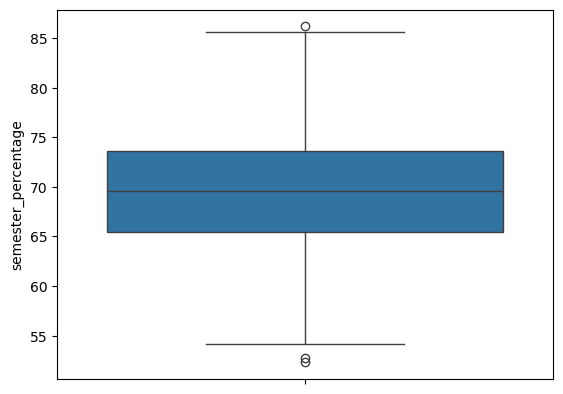

In [42]:
sns.boxplot(df2['semester_percentage'])

<Axes: ylabel='semester_percentage'>

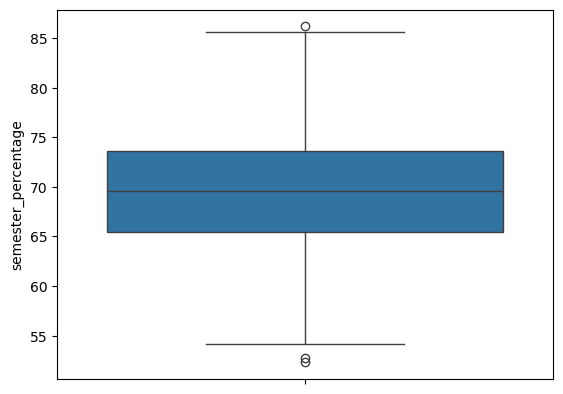

In [43]:
sns.boxplot(df2['semester_percentage'])

# Inter Quartile Range

## Trimming

<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

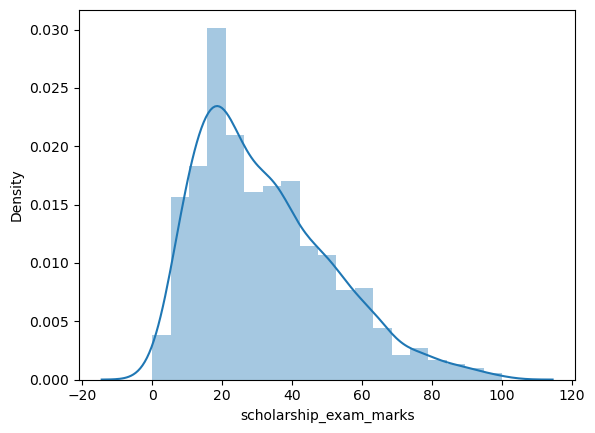

In [44]:
sns.distplot(df2["scholarship_exam_marks"])

<Axes: ylabel='scholarship_exam_marks'>

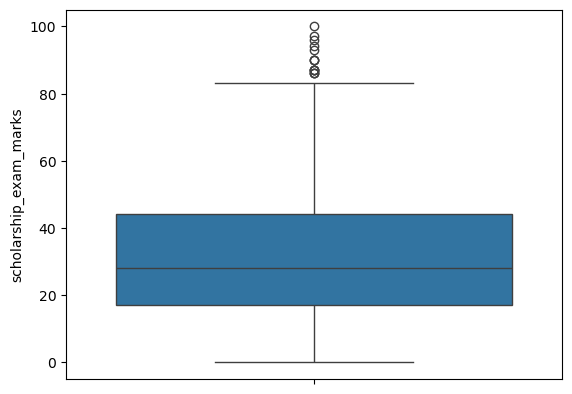

In [45]:
sns.boxplot(df2["scholarship_exam_marks"])

In [46]:
Q1 = df2["scholarship_exam_marks"].quantile(0.25)
Q3 = df2["scholarship_exam_marks"].quantile(0.75)

In [47]:
print(Q1, ",", Q3)

17.0 , 44.0


## If we find to inter quartile range the formula is - Q3 - Q1

In [48]:
IQR = Q3-Q1
print(IQR)

27.0


In [49]:
min = Q1 - 1.5* IQR
max = Q3 + 1.5* IQR

In [50]:
min

-23.5

In [51]:
max

84.5

<Axes: ylabel='scholarship_exam_marks'>

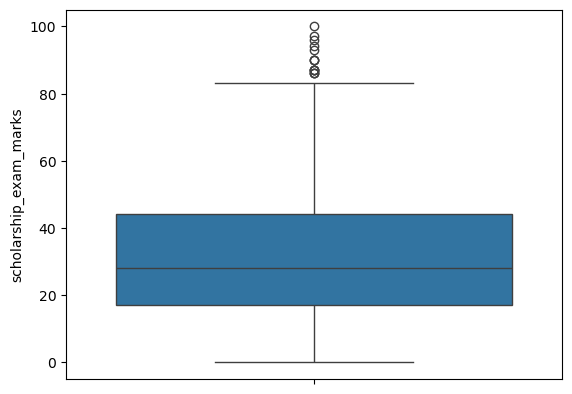

In [52]:
sns.boxplot(df2["scholarship_exam_marks"])

In [53]:
df2[(df2["scholarship_exam_marks"] < min) | (df2["scholarship_exam_marks"] > max)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


In [54]:
df3 = df2[(df2["scholarship_exam_marks"] > min) & (df2["scholarship_exam_marks"] < max)]

In [55]:
df3

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


<function matplotlib.pyplot.show(close=None, block=None)>

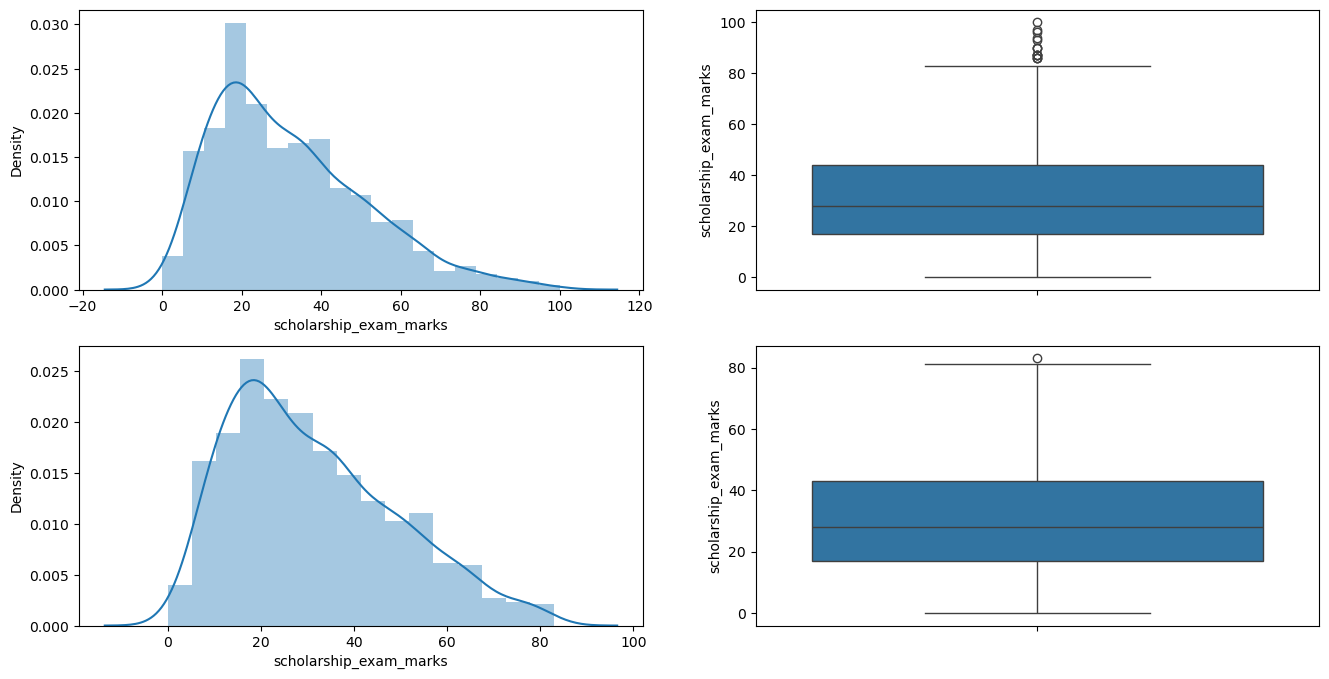

In [56]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(df2["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(df2["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.distplot(df3["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(df3["scholarship_exam_marks"])

plt.show

In [57]:
df3

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


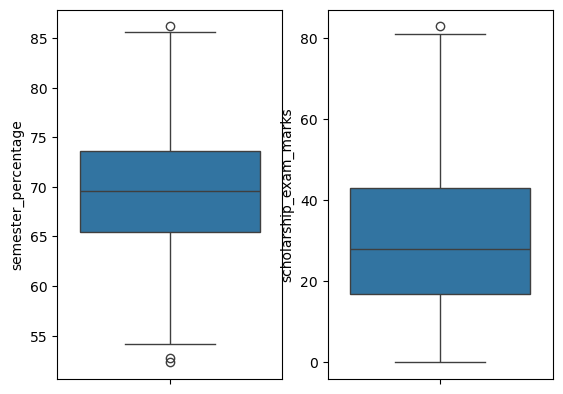

In [58]:
plt.subplot(1,2,1)
sns.boxplot(df3["semester_percentage"])
plt.subplot(1,2,2)
sns.boxplot(df3["scholarship_exam_marks"])

plt.show()

In [59]:
df3.shape

(980, 3)

## Capping

<Axes: ylabel='scholarship_exam_marks'>

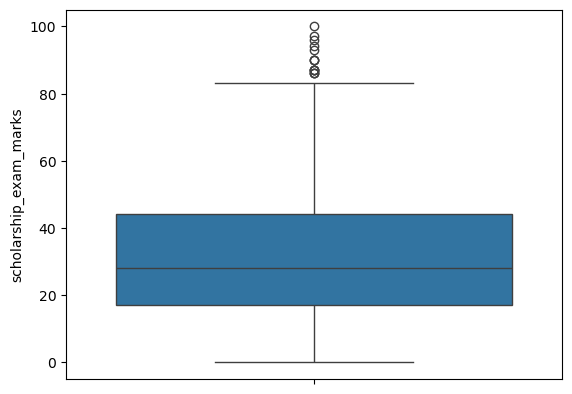

In [60]:
sns.boxplot(df2["scholarship_exam_marks"])

In [61]:
df2["scholarship_exam_marks"] = np.where(df2["scholarship_exam_marks"]> max, max,np.where(df2["scholarship_exam_marks"]<min, min,
                                                                                          df2["scholarship_exam_marks"]))

<Axes: ylabel='scholarship_exam_marks'>

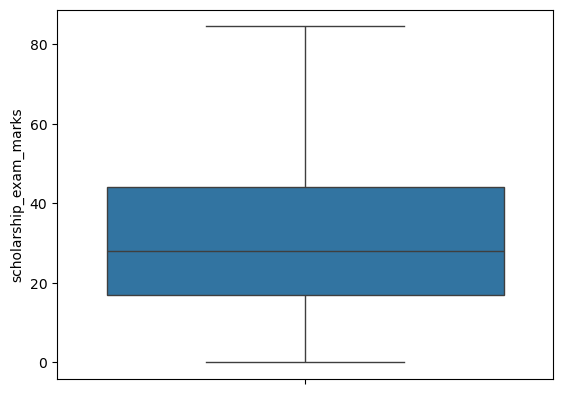

In [62]:
sns.boxplot(df2["scholarship_exam_marks"])

In [63]:
df2.shape

(995, 3)

# Percentile

In [64]:
pd = pd.read_csv("weight-height.csv")

In [65]:
pd

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [66]:
pd.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<function matplotlib.pyplot.show(close=None, block=None)>

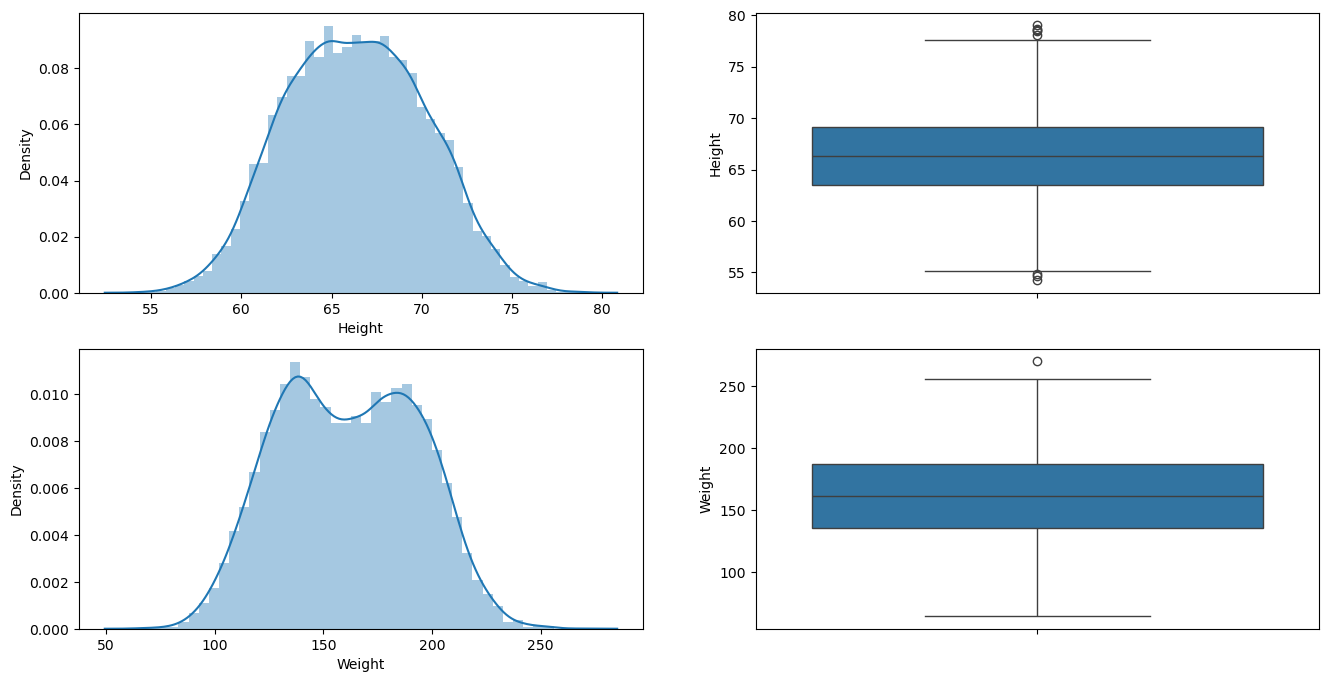

In [72]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(pd["Height"])

plt.subplot(2,2,2)
sns.boxplot(pd["Height"])

plt.subplot(2,2,3)
sns.distplot(pd["Weight"])

plt.subplot(2,2,4)
sns.boxplot(pd["Weight"])

plt.show

In [73]:
pd.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [74]:
min_limit = pd["Height"].quantile(0.01)
max_limit = pd["Height"].quantile(0.99)
print(min_limit, ",", max_limit)

58.13441158671655 , 74.7857900583366


## Trimming

Find Outlier


In [76]:
pd[(pd["Height"]> max_limit) | (pd["Height"]<min_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


Which are not outlier

In [83]:
pd1 = pd[(pd["Height"]< max_limit) & (pd["Height"]>min_limit)]

In [84]:
pd1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [85]:
pd.shape

(10000, 3)

In [86]:
pd1.shape

(9800, 3)

<Axes: ylabel='Height'>

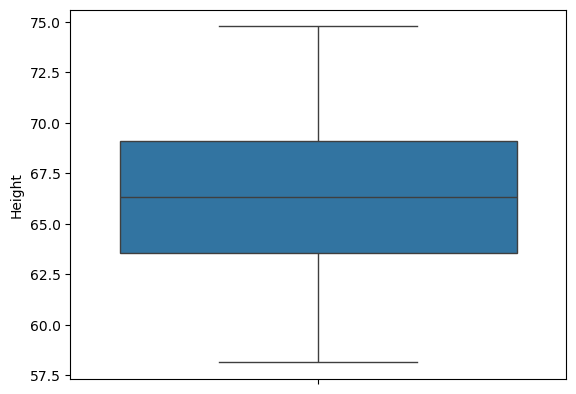

In [89]:
sns.boxplot(pd1["Height"])

## Capping

<Axes: ylabel='Height'>

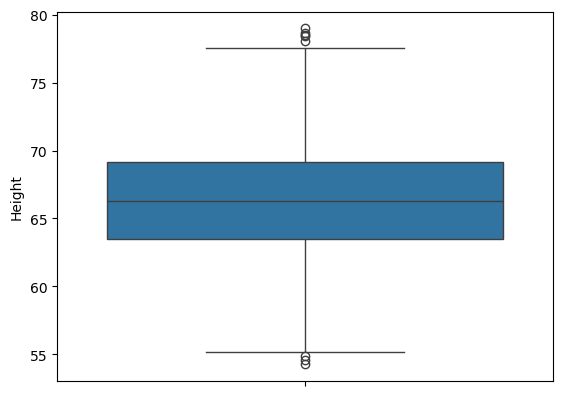

In [91]:
sns.boxplot(pd["Height"])

In [92]:
pd["Height"] = np.where(pd["Height"]> max_limit, max_limit, np.where(pd["Height"]<min_limit, min_limit, pd["Height"]))

<Axes: ylabel='Height'>

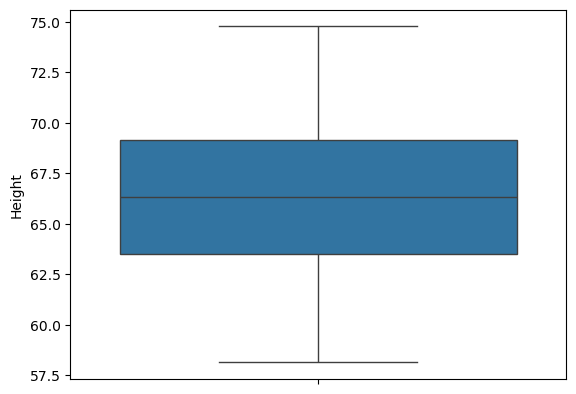

In [93]:
sns.boxplot(pd["Height"])

In [94]:
pd.shape

(10000, 3)